## Pascal VOC Dataset

In [1]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

--2021-09-29 00:23:39--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  15.1MB/s    in 2m 8s   

2021-09-29 00:25:47 (14.9 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [2]:
%pwd

'/content'

In [3]:
ls -la

total 1952796
drwxr-xr-x 1 root root       4096 Sep 29 00:23 ./
drwxr-xr-x 1 root root       4096 Sep 29 00:21 ../
drwxr-xr-x 4 root root       4096 Sep 16 13:39 .config/
drwxr-xr-x 1 root root       4096 Sep 16 13:40 sample_data/
-rw-r--r-- 1 root root 1999639040 Jan  1  2019 VOCtrainval_11-May-2012.tar


In [4]:
mkdir data

In [5]:
!tar -xvf VOCtrainval_11-May-2012.tar -C ./data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [9]:
cat ./data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

In [8]:
import xml.etree.ElementTree as ET

In [10]:
xml_file = "./data/VOCdevkit/VOC2012/Annotations/2007_000032.xml"

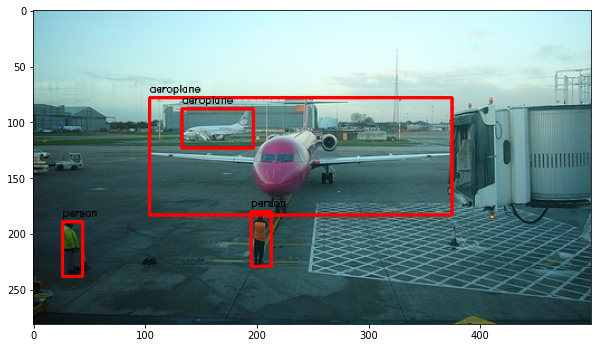

In [44]:
import os
import cv2
import matplotlib.pyplot as plt

img_dir = "/content/data/VOCdevkit/VOC2012/JPEGImages/"
tree = ET.parse(xml_file)
root = tree.getroot()

img_name = root.find('filename').text
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)

img_full_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find('bndbox')
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)
  
  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)

  object_dict = {'class_name':class_name, 'bndbox_coor':bndbox_coor}
  object_list.append(object_dict)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## MS COCO Dataset

In [45]:
!wget "http://images.cocodataset.org/zips/train2017.zip"

--2021-09-29 01:37:41--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.92.108
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.92.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  37.6MB/s    in 5m 52s  

2021-09-29 01:43:34 (52.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [46]:
!wget "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

--2021-09-29 01:43:37--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.76.140
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.76.140|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.4MB/s    in 2.5s    

2021-09-29 01:43:39 (96.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [47]:
mkdir data2

In [49]:
!wget "http://images.cocodataset.org/zips/val2017.zip"

--2021-09-29 01:50:33--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.80.4
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.80.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  92.8MB/s    in 8.4s    

2021-09-29 01:50:41 (92.4 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [51]:
!unzip "val2017.zip" -d /content/data2

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/data2/val2017/000000212226.jpg  
 extracting: /content/data2/val2017/000000231527.jpg  
 extracting: /content/data2/val2017/000000578922.jpg  
 extracting: /content/data2/val2017/000000062808.jpg  
 extracting: /content/data2/val2017/000000119038.jpg  
 extracting: /content/data2/val2017/000000114871.jpg  
 extracting: /content/data2/val2017/000000463918.jpg  
 extracting: /content/data2/val2017/000000365745.jpg  
 extracting: /content/data2/val2017/000000320425.jpg  
 extracting: /content/data2/val2017/000000481404.jpg  
 extracting: /content/data2/val2017/000000314294.jpg  
 extracting: /content/data2/val2017/000000335328.jpg  
 extracting: /content/data2/val2017/000000513688.jpg  
 extracting: /content/data2/val2017/000000158548.jpg  
 extracting: /content/data2/val2017/000000132116.jpg  
 extracting: /content/data2/val2017/000000415238.jpg  
 extracting: /content/data2/val2017/000000321333.jpg  
 extracting: /content/data2/v

In [53]:
!unzip "annotations_trainval2017.zip" -d /content/data2

Archive:  annotations_trainval2017.zip
  inflating: /content/data2/annotations/instances_train2017.json  
  inflating: /content/data2/annotations/instances_val2017.json  
  inflating: /content/data2/annotations/captions_train2017.json  
  inflating: /content/data2/annotations/captions_val2017.json  
  inflating: /content/data2/annotations/person_keypoints_train2017.json  
  inflating: /content/data2/annotations/person_keypoints_val2017.json  


In [57]:
ls -la ./data2/annotations/

total 814888
drwxr-xr-x 2 root root      4096 Sep 29 01:51 ./
drwxr-xr-x 4 root root      4096 Sep 29 01:53 ../
-rw-rw-r-- 1 root root  91865115 Sep  1  2017 captions_train2017.json
-rw-rw-r-- 1 root root   3872473 Sep  1  2017 captions_val2017.json
-rw-rw-r-- 1 root root 469785474 Sep  1  2017 instances_train2017.json
-rw-rw-r-- 1 root root  19987840 Sep  1  2017 instances_val2017.json
-rw-rw-r-- 1 root root 238884731 Sep  1  2017 person_keypoints_train2017.json
-rw-rw-r-- 1 root root  10020657 Sep  1  2017 person_keypoints_val2017.json


In [58]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 1s (482 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

In [59]:
!jq . /content/data2/annotations/instances_val2017.json > output.json

In [60]:
!head -200 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-sa/2.0/",
      "id": 5,
      "name": "Attribution-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nd/2.0/

In [64]:
!tail -n 200 output.json

      "id": 46,
      "name": "wine glass"
    },
    {
      "supercategory": "kitchen",
      "id": 47,
      "name": "cup"
    },
    {
      "supercategory": "kitchen",
      "id": 48,
      "name": "fork"
    },
    {
      "supercategory": "kitchen",
      "id": 49,
      "name": "knife"
    },
    {
      "supercategory": "kitchen",
      "id": 50,
      "name": "spoon"
    },
    {
      "supercategory": "kitchen",
      "id": 51,
      "name": "bowl"
    },
    {
      "supercategory": "food",
      "id": 52,
      "name": "banana"
    },
    {
      "supercategory": "food",
      "id": 53,
      "name": "apple"
    },
    {
      "supercategory": "food",
      "id": 54,
      "name": "sandwich"
    },
    {
      "supercategory": "food",
      "id": 55,
      "name": "orange"
    },
    {
      "supercategory": "food",
      "id": 56,
      "name": "broccoli"
    },
    {
      "supercategory": "food",
      "id": 57,
      "name": "carrot"
    },
    {
      "supercategory":

In [65]:
!grep -n 'annotations' output.json

50054:  "annotations": [


In [66]:
!head -50300 output.json

{
  "info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
  },
  "licenses": [
    {
      "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
      "id": 1,
      "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc/2.0/",
      "id": 2,
      "name": "Attribution-NonCommercial License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
      "id": 3,
      "name": "Attribution-NonCommercial-NoDerivs License"
    },
    {
      "url": "http://creativecommons.org/licenses/by/2.0/",
      "id": 4,
      "name": "Attribution License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-sa/2.0/",
      "id": 5,
      "name": "Attribution-ShareAlike License"
    },
    {
      "url": "http://creativecommons.org/licenses/by-nd/2.0/